<a href="https://colab.research.google.com/github/BinRaditz/Electricity-Consumption-Analysis-and-Prediction-in-Thailand/blob/main/Project_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Data Science


Author:Mr. BIN RAHCHAHUN

Email: bin.rahchahun@gmail.com

Presentation: https://shorturl.at/a9U6x

# Exploratory Data Analysis

## Data Cleaning and Preprocessing

In [ ]:
# Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import io

In [ ]:
dframe = pd.read_csv('https://raw.githubusercontent.com/BinRaditz/Electricity-Consumption-Analysis-and-Prediction-in-Thailand/main/Data.csv')

In [ ]:
dframe

,Year,Month,Tariff,Quantity,UNIT
0,2002,January,Residential (< 150),488.424223,GWh
1,2002,January,Residential (> 150),1035.660954,GWh
2,2002,January,Small General,693.458475,GWh
3,2002,January,Medium General,1415.308196,GWh
4,2002,January,Large General,2957.601319,GWh
...,...,...,...,...,...
3583,2024,December,Temporary,123.352195,GWh
3584,2024,December,Stand By Rate,14.762940,GWh
3585,2024,December,Interruptible Rate,101.474145,GWh
3586,2024,December,Free of Charge,408.309461,GWh


In [ ]:
# Filter out the year 2025
dframe = dframe[dframe['Year'] != 2025]

In [ ]:
dframe.info() # Data Structure

<class 'pandas.core.frame.DataFrame'>
Index: 3588 entries, 0 to 3587
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      3588 non-null   int64  
 1   Month     3588 non-null   object 
 2   Tariff    3588 non-null   object 
 3   Quantity  3588 non-null   float64
 4   UNIT      3588 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 168.2+ KB


In [ ]:
display(dframe.head(3640))

,Year,Month,Tariff,Quantity,UNIT
0,2002,January,Residential (< 150),488.424223,GWh
1,2002,January,Residential (> 150),1035.660954,GWh
2,2002,January,Small General,693.458475,GWh
3,2002,January,Medium General,1415.308196,GWh
4,2002,January,Large General,2957.601319,GWh
...,...,...,...,...,...
3583,2024,December,Temporary,123.352195,GWh
3584,2024,December,Stand By Rate,14.762940,GWh
3585,2024,December,Interruptible Rate,101.474145,GWh
3586,2024,December,Free of Charge,408.309461,GWh


In [ ]:
# Check missing value
print("Dimension Dataset:", dframe.shape)
print("Missing Valuew:")
display(dframe.isnull().sum())

Dimension Dataset: (3588, 5)
Missing Valuew:


,0
Year,0
Month,0
Tariff,0
Quantity,0
UNIT,0


In [ ]:
# Clear Duplicate data
dframe = dframe.drop_duplicates()
dframe.shape

(3588, 5)

In [ ]:
# Clear quantity value is 0
dframe = dframe[dframe['Quantity'] != 0]
display(dframe.head())

,Year,Month,Tariff,Quantity,UNIT
0,2002,January,Residential (< 150),488.424223,GWh
1,2002,January,Residential (> 150),1035.660954,GWh
2,2002,January,Small General,693.458475,GWh
3,2002,January,Medium General,1415.308196,GWh
4,2002,January,Large General,2957.601319,GWh


## Statistics

In [ ]:
dframe.describe()

,Year,Quantity
count,3587.000000,3587.000000
mean,2013.003067,1027.220650
std,6.632555,1535.156758
min,2002.000000,0.121565
25%,2007.000000,99.658550
50%,2013.000000,291.311698
75%,2019.000000,1561.471591
max,2024.000000,6835.988212


In [ ]:
median_values = dframe['Quantity'].median()
print("Mean:\n", median_values)

Mean:
 291.311698


## Visualization

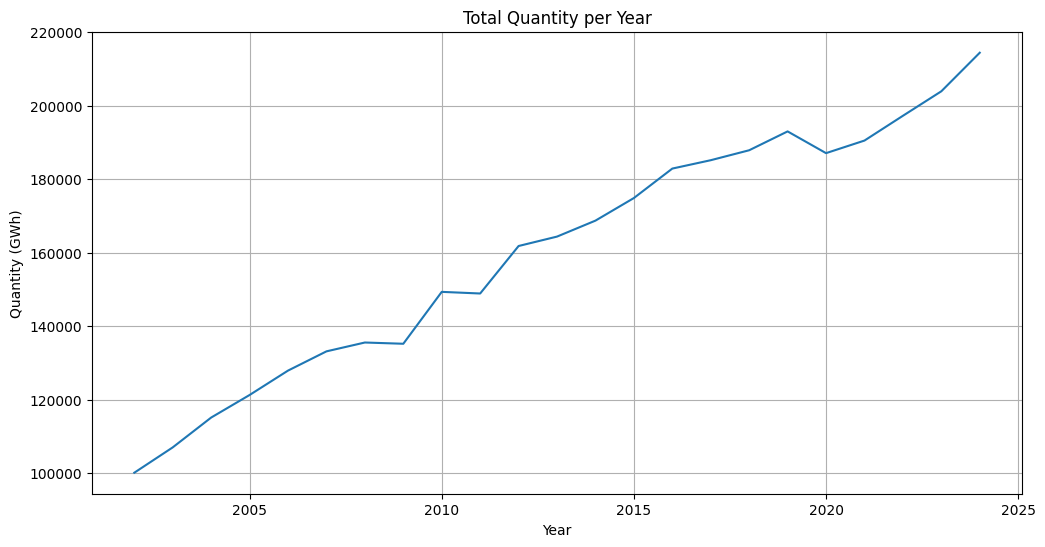

In [ ]:
# Group by year and sum the quantity
yearly_quantity = dframe.groupby('Year')['Quantity'].sum().reset_index()

# Create a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_quantity, x='Year', y='Quantity')
plt.title('Total Quantity per Year')
plt.xlabel('Year')
plt.ylabel('Quantity (GWh)')
plt.grid(True)
plt.show()

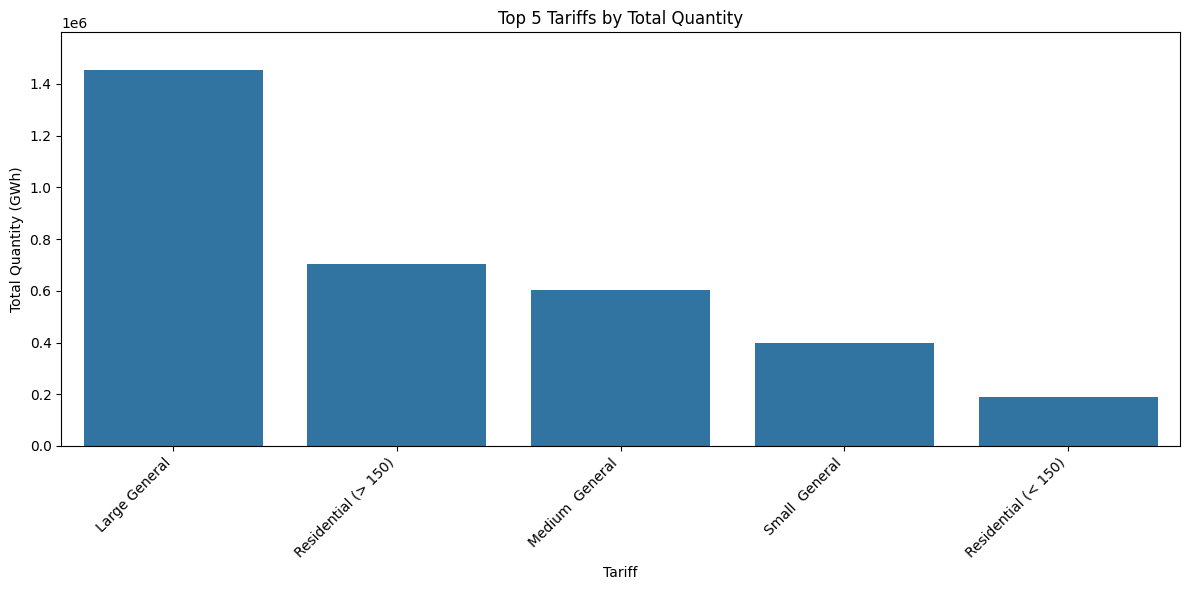

In [ ]:
# Group by Tariff and sum the quantity
tariff_quantity = dframe.groupby('Tariff')['Quantity'].sum().reset_index()

# Sort by quantity and get the top 5
top_5_tariffs = tariff_quantity.sort_values(by='Quantity', ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_tariffs, x='Tariff', y='Quantity')
plt.title('Top 5 Tariffs by Total Quantity')
plt.xlabel('Tariff')
plt.ylabel('Total Quantity (GWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis in 2024

In [ ]:
# Filter data for 2024
dframe_2024 = dframe[dframe['Year'] == 2024].copy()

# Average monthly consumption in 2024
average_monthly_consumption_2024 = dframe_2024.groupby('Month')['Quantity'].mean().mean()
print(f"Average Monthly Consumption in 2024: {average_monthly_consumption_2024} GWh")

# Standard deviation per type of consumer (Tariff) in 2024
std_dev_per_tariff_2024 = dframe_2024.groupby('Tariff')['Quantity'].std().reset_index()
print("\nStandard Deviation per Tariff in 2024:")
display(std_dev_per_tariff_2024)

# Mean, Standard Deviation, Max, Min for Quantity in 2024
quantity_stats_2024 = dframe_2024['Quantity'].agg(['mean', 'std', 'max', 'min'])
print("\nQuantity Statistics in 2024:")
display(quantity_stats_2024)

Average Monthly Consumption in 2024: 1374.1672315064104 GWh

Standard Deviation per Tariff in 2024:


,Tariff,Quantity
0,Agriculture Pumping,18.920521
1,Direct Customer,9.189858
2,Free of Charge,12.289276
3,Government & Nonprofit,1.441382
4,Interruptible Rate,20.472011
5,Large General,295.798400
6,Medium General,162.883575
7,Residential (< 150),130.810489
8,Residential (> 150),588.108014
9,Small General,144.738922



Quantity Statistics in 2024:


,Quantity
mean,1374.167232
std,1984.901244
max,6826.535730
min,3.943370


from matplotlib import pyplot as plt
std_dev_per_tariff_2024['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
std_dev_per_tariff_2024['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 2. Calculate Total Quantity for 2024
total_quantity_2024 = dframe_2024['Quantity'].sum()
print(f"Total Quantity in 2024: {total_quantity_2024} GWh")

# 3. Calculate Percentage per Tariff for 2024
tariff_quantity_2024 = dframe_2024.groupby('Tariff')['Quantity'].sum().reset_index()
tariff_quantity_2024['Percentage'] = (tariff_quantity_2024['Quantity'] / total_quantity_2024) * 100
display(tariff_quantity_2024)

Total Quantity in 2024: 214370.088115 GWh

Quantity Statistics in 2024:


,Quantity
mean,1374.167232
std,1984.901244
max,6826.535730
min,3.943370


,Tariff,Quantity,Percentage
0,Agriculture Pumping,477.495177,0.222743
1,Direct Customer,1338.135237,0.624217
2,Free of Charge,4621.301125,2.155758
3,Government & Nonprofit,248.678565,0.116004
4,Interruptible Rate,1330.070991,0.620455
5,Large General,77269.810547,36.045052
6,Medium General,34089.969728,15.902391
7,Residential (< 150),7861.795093,3.667394
8,Residential (> 150),54302.303645,25.331101
9,Small General,23949.425596,11.172000


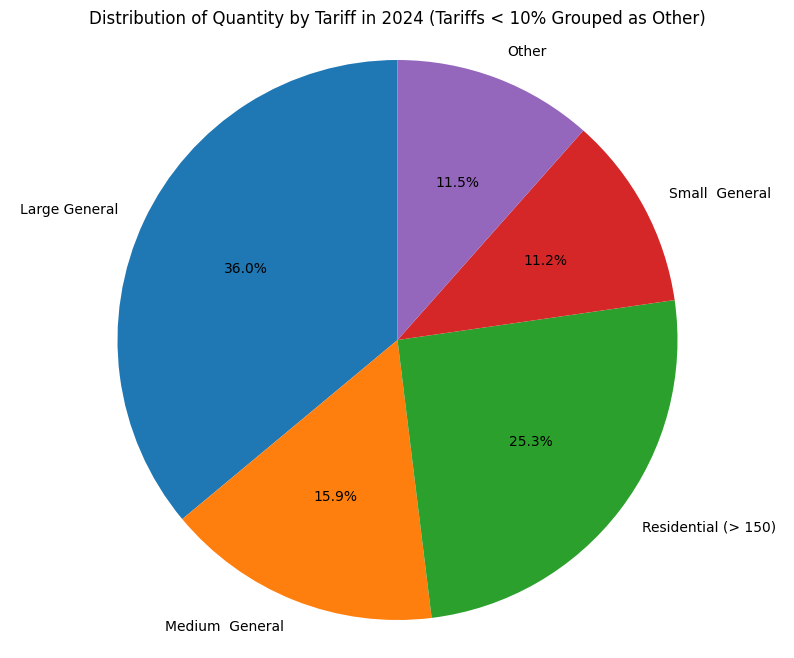

In [ ]:
# 3. Identify Small Tariffs and Group
threshold = 10
small_tariffs = tariff_quantity_2024[tariff_quantity_2024['Percentage'] < threshold]
large_tariffs = tariff_quantity_2024[tariff_quantity_2024['Percentage'] >= threshold]

other_quantity = small_tariffs['Quantity'].sum()
other_percentage = small_tariffs['Percentage'].sum()

# Create a new dataframe for plotting
if other_quantity > 0:
    other_row = pd.DataFrame({'Tariff': ['Other'], 'Quantity': [other_quantity], 'Percentage': [other_percentage]})
    tariff_quantity_2024_grouped = pd.concat([large_tariffs, other_row], ignore_index=True)
else:
    tariff_quantity_2024_grouped = large_tariffs

# 4. Create Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(tariff_quantity_2024_grouped['Quantity'], labels=tariff_quantity_2024_grouped['Tariff'], autopct='%1.1f%%', startangle=90)

# 5. Add Labels and Title
plt.title('Distribution of Quantity by Tariff in 2024 (Tariffs < 10% Grouped as Other)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

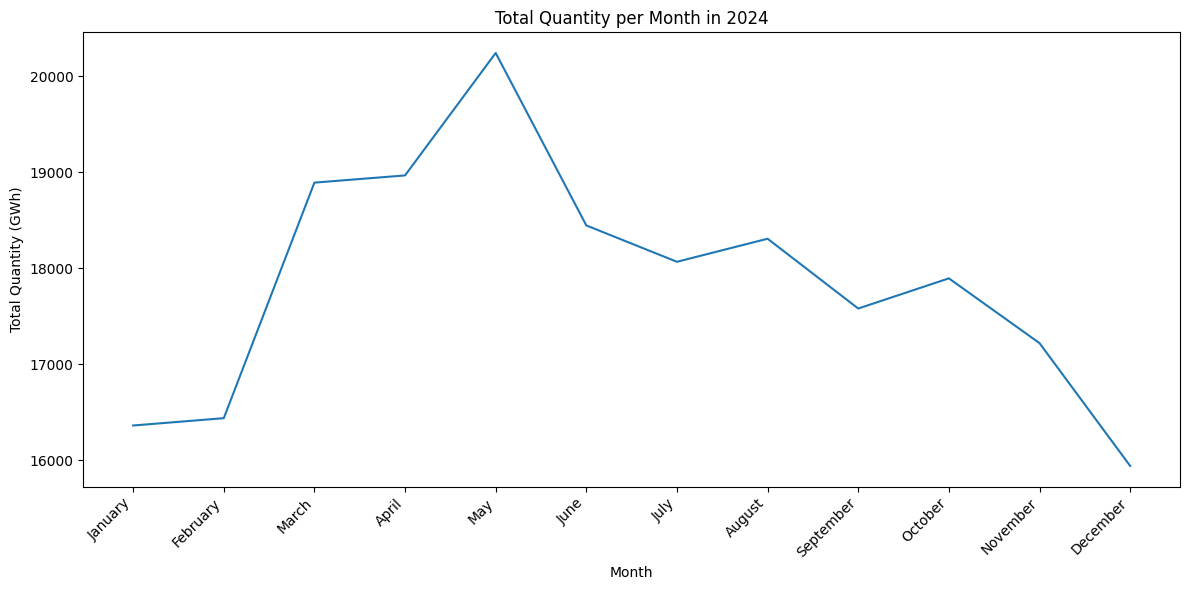

In [ ]:
# Filter data for 2024
dframe_2024 = dframe[dframe['Year'] == 2024].copy()

# Group by month and sum the quantity for 2024
monthly_quantity_2024 = dframe_2024.groupby('Month')['Quantity'].sum().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with the specified order
monthly_quantity_2024['Month'] = pd.Categorical(monthly_quantity_2024['Month'], categories=month_order, ordered=True)

# Sort by the ordered month
monthly_quantity_2024 = monthly_quantity_2024.sort_values('Month')

# Create a line chart for 2024
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quantity_2024, x='Month', y='Quantity')
plt.title('Total Quantity per Month in 2024')
plt.xlabel('Month')
plt.ylabel('Total Quantity (GWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  Analysis and Modeling

## Linear Regression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BinRaditz/Electricity-Consumption-Analysis-and-Prediction-in-Thailand/main/Data.csv')
df

,Year,Month,Tariff,Quantity,UNIT
0,2002,January,Residential (< 150),488.424223,GWh
1,2002,January,Residential (> 150),1035.660954,GWh
2,2002,January,Small General,693.458475,GWh
3,2002,January,Medium General,1415.308196,GWh
4,2002,January,Large General,2957.601319,GWh
...,...,...,...,...,...
3635,2025,April,Temporary,128.667846,GWh
3636,2025,April,Stand By Rate,12.643290,GWh
3637,2025,April,Interruptible Rate,101.574145,GWh
3638,2025,April,Free of Charge,383.540481,GWh


In [ ]:
# Filter out the year 2025
df = df[df['Year'] != 2025]

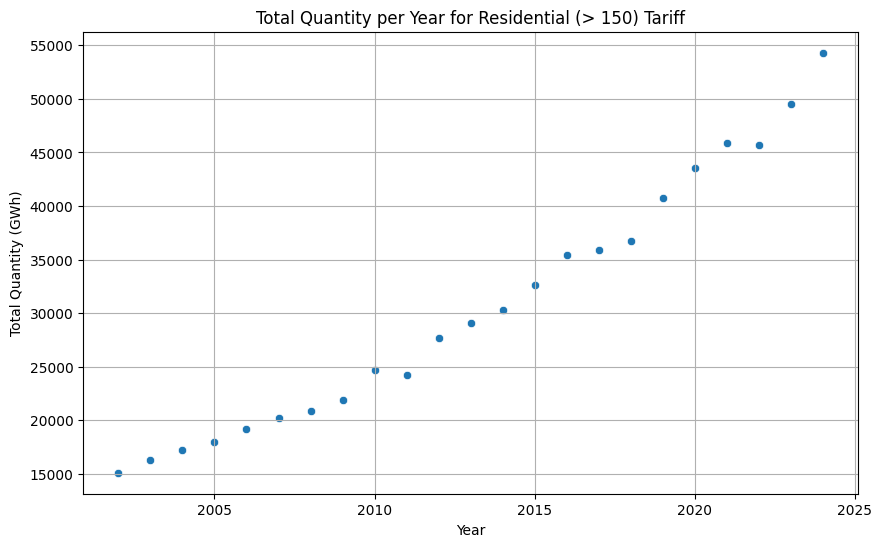

In [ ]:
# Filter the DataFrame for 'Residential (> 150)' tariff
residential_gt_150_df = df[df['Tariff'] == 'Residential (> 150)'].copy()

# Group by year and sum the quantity for 'Residential (> 150)'
yearly_residential_gt_150 = residential_gt_150_df.groupby('Year')['Quantity'].sum().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_residential_gt_150, x='Year', y='Quantity')
plt.title('Total Quantity per Year for Residential (> 150) Tariff')
plt.xlabel('Year')
plt.ylabel('Total Quantity (GWh)')
plt.grid(True)
plt.show()

### Data Preparation

In [ ]:
# Combine Year and Month columns into a single datetime column
df['Year_Month'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Display the updated DataFrame with the new column
display(df.head(13))

/tmp/ipython-input-2650608538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Month'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')


,Year,Month,Tariff,Quantity,UNIT,Year_Month
0,2002,January,Residential (< 150),488.424223,GWh,2002-01-01
1,2002,January,Residential (> 150),1035.660954,GWh,2002-01-01
2,2002,January,Small General,693.458475,GWh,2002-01-01
3,2002,January,Medium General,1415.308196,GWh,2002-01-01
4,2002,January,Large General,2957.601319,GWh,2002-01-01
5,2002,January,Specific Business,235.740123,GWh,2002-01-01
6,2002,January,Government & Nonprofit,246.117053,GWh,2002-01-01
7,2002,January,Agriculture Pumping,19.367330,GWh,2002-01-01
8,2002,January,Temporary,28.807450,GWh,2002-01-01
9,2002,January,Stand By Rate,0.672150,GWh,2002-01-01


In [ ]:
# Filter the DataFrame for 'Residential (> 150)' tariff and exclude 2025
residential_gt_150_df = df[(df['Tariff'] == 'Residential (> 150)') & (df['Year'] != 2025)].copy()

# Group by year and sum the quantity for 'Residential (> 150)'
yearly_residential_gt_150 = residential_gt_150_df.groupby('Year')['Quantity'].sum().reset_index()

X1 = yearly_residential_gt_150['Year'].values.reshape(-1, 1)
y1 = yearly_residential_gt_150['Quantity'].values

In [ ]:
# Filter the DataFrame for 'Residential (> 150)' tariff and exclude 2025
residential_gt_150_df = df[(df['Tariff'] == 'Residential (> 150)') & (df['Year'] != 2025)].copy()

# Group by year and sum the quantity for 'Residential (> 150)'
yearly_residential_gt_150 = residential_gt_150_df.groupby('Year')['Quantity'].sum().reset_index()

X1 = pd.DataFrame(yearly_residential_gt_150['Year'].values.reshape(-1, 1), columns=['Year'])
y1 = pd.DataFrame(yearly_residential_gt_150['Quantity'].values, columns=['Quantity'])

print("X1 DataFrame:")
display(X1.head())
print("\ny1 DataFrame:")
display(y1.head())

X1 DataFrame:


,Year
0,2002
1,2003
2,2004
3,2005
4,2006



y1 DataFrame:


,Quantity
0,15102.346501
1,16290.509823
2,17227.229257
3,17980.099600
4,19150.987110


In [ ]:
y1

,Quantity
0,15102.346501
1,16290.509823
2,17227.229257
3,17980.099600
4,19150.987110
5,20194.458494
6,20886.812507
7,21913.462864
8,24677.482770
9,24198.109556


In [ ]:
from sklearn.linear_model import LinearRegression
modelOjbect = LinearRegression()

### Modeling

In [ ]:
modelOjbect.fit(X1, y1)

LinearRegression()

In [ ]:
modelOjbect.score(X1, y1)

0.9711475820265636

In [ ]:
modelOjbect.coef_[0]

array([1703.29150505])

In [ ]:
theta1 = modelOjbect.coef_[0]
theta0 = modelOjbect.intercept_
yhat = theta0 + theta1 * X1
yhat

,Year
0,11917.576587
1,13620.868092
2,15324.159597
3,17027.451102
4,18730.742607
5,20434.034112
6,22137.325617
7,23840.617122
8,25543.908627
9,27247.200132


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = modelOjbect.predict(X1)
print("R² Score:", r2_score(y1, y_pred))
print("MAE:", mean_absolute_error(y1, y_pred))
print("MSE:", mean_squared_error(y1, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y1, y_pred)))

R² Score: 0.9711475820265636
MAE: 1602.360543160868
MSE: 3792517.724688143
RMSE: 1947.4387601894298


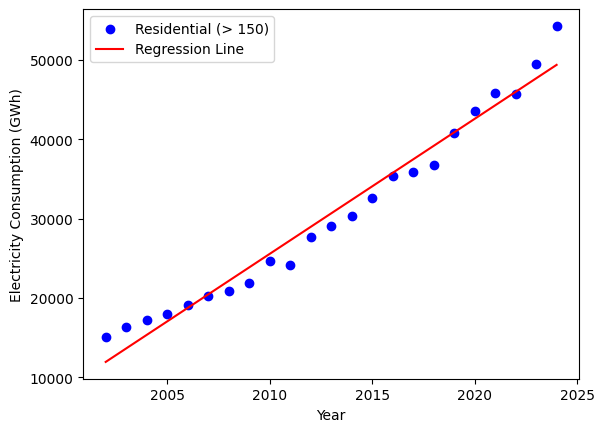

In [ ]:
plt.scatter(X1, y1, color='blue', label='Residential (> 150)')
plt.plot(X1, y_pred, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (GWh)')
plt.legend()
plt.show()

In [ ]:
modelOjbect.score(X1,y1)

0.9711475820265636

## Multilinear Regression

### Data Preparation

In [ ]:
# Filter data for 2024
dframe_2024_filtered = dframe[dframe['Year'] == 2024].copy()

# Filter for the specified tariffs
tariffs_for_mlr = ['Large General', 'Medium  General', 'Residential (> 150)', 'Small  General']
dframe_mlr = dframe_2024_filtered[dframe_2024_filtered['Tariff'].isin(tariffs_for_mlr)].copy()

# Group by month and tariff and sum the quantity
monthly_tariff_quantity_2024 = dframe_mlr.groupby(['Month', 'Tariff'])['Quantity'].sum().reset_index()

# Pivot the table to have months as rows and tariffs as columns
monthly_mlr_data = monthly_tariff_quantity_2024.pivot(index='Month', columns='Tariff', values='Quantity').reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a numerical representation (1-12)
monthly_mlr_data['Month_No'] = monthly_mlr_data['Month'].apply(lambda x: month_order.index(x) + 1)

# Ensure all required tariff columns are present, fill missing values with 0
required_columns = ['Month', 'Month_No'] + tariffs_for_mlr
monthly_mlr_data = monthly_mlr_data.reindex(columns=required_columns, fill_value=0)

# Sort by the new numerical month
monthly_mlr_data = monthly_mlr_data.sort_values('Month_No')

# Add a 'No.' column
monthly_mlr_data['No.'] = range(1, len(monthly_mlr_data) + 1)

# Reorder columns, placing 'Month_No' after 'No.' and dropping the original 'Month' column
column_order = ['No.', 'Month_No'] + tariffs_for_mlr
monthly_mlr_data = monthly_mlr_data[column_order]

# Display the resulting table
display(monthly_mlr_data)

Tariff,No.,Month_No,Large General,Medium General,Residential (> 150),Small General
4,1,1,6202.703247,2589.516955,3763.856812,1815.377652
3,2,2,6171.348778,2626.813684,3844.979805,1828.799898
7,3,3,6823.766056,2968.663691,4670.037503,2091.588976
0,4,4,6173.080885,2883.536743,5357.800019,2174.931955
8,5,5,6826.535730,3102.840199,5631.558271,2274.450948
6,6,6,6505.539864,2933.622914,4906.835801,2074.833971
5,7,7,6602.559601,2894.789607,4564.954704,2005.148808
1,8,8,6646.525311,2977.126207,4668.263655,2032.957106
11,9,9,6439.728562,2844.169745,4440.487880,1965.265541
10,10,10,6649.453832,2860.133045,4443.600852,1967.573194


In [ ]:
monthly_mlr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 4 to 2
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  12 non-null     int64  
 1   Month_No             12 non-null     int64  
 2   Large General        12 non-null     float64
 3   Medium  General      12 non-null     float64
 4   Residential (> 150)  12 non-null     float64
 5   Small  General       12 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 672.0 bytes


In [ ]:
monthly_mlr_data.columns = ['No', 'Y', 'X1', 'X2', 'X3', 'X4']

In [ ]:
monthly_mlr_data.head()

,No,Y,X1,X2,X3,X4
4,1,1,6202.703247,2589.516955,3763.856812,1815.377652
3,2,2,6171.348778,2626.813684,3844.979805,1828.799898
7,3,3,6823.766056,2968.663691,4670.037503,2091.588976
0,4,4,6173.080885,2883.536743,5357.800019,2174.931955
8,5,5,6826.535730,3102.840199,5631.558271,2274.450948


In [ ]:
monthly_mlr_data.corr()

,No,Y,X1,X2,X3,X4
No,1.000000,1.000000,-0.099683,0.027162,-0.123499,-0.178322
Y,1.000000,1.000000,-0.099683,0.027162,-0.123499,-0.178322
X1,-0.099683,-0.099683,1.000000,0.857061,0.587818,0.650074
X2,0.027162,0.027162,0.857061,1.000000,0.884095,0.904711
X3,-0.123499,-0.123499,0.587818,0.884095,1.000000,0.989037
X4,-0.178322,-0.178322,0.650074,0.904711,0.989037,1.000000


<Axes: >

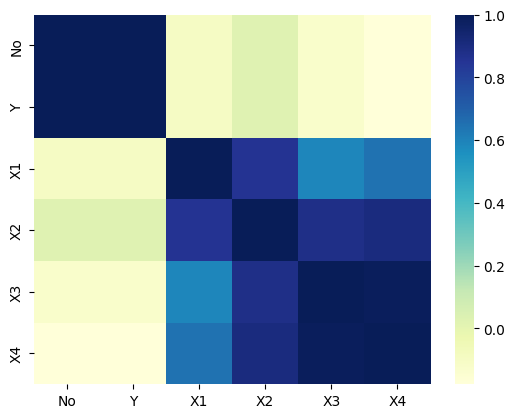

In [ ]:
sns.heatmap(monthly_mlr_data.corr(),cmap="YlGnBu")

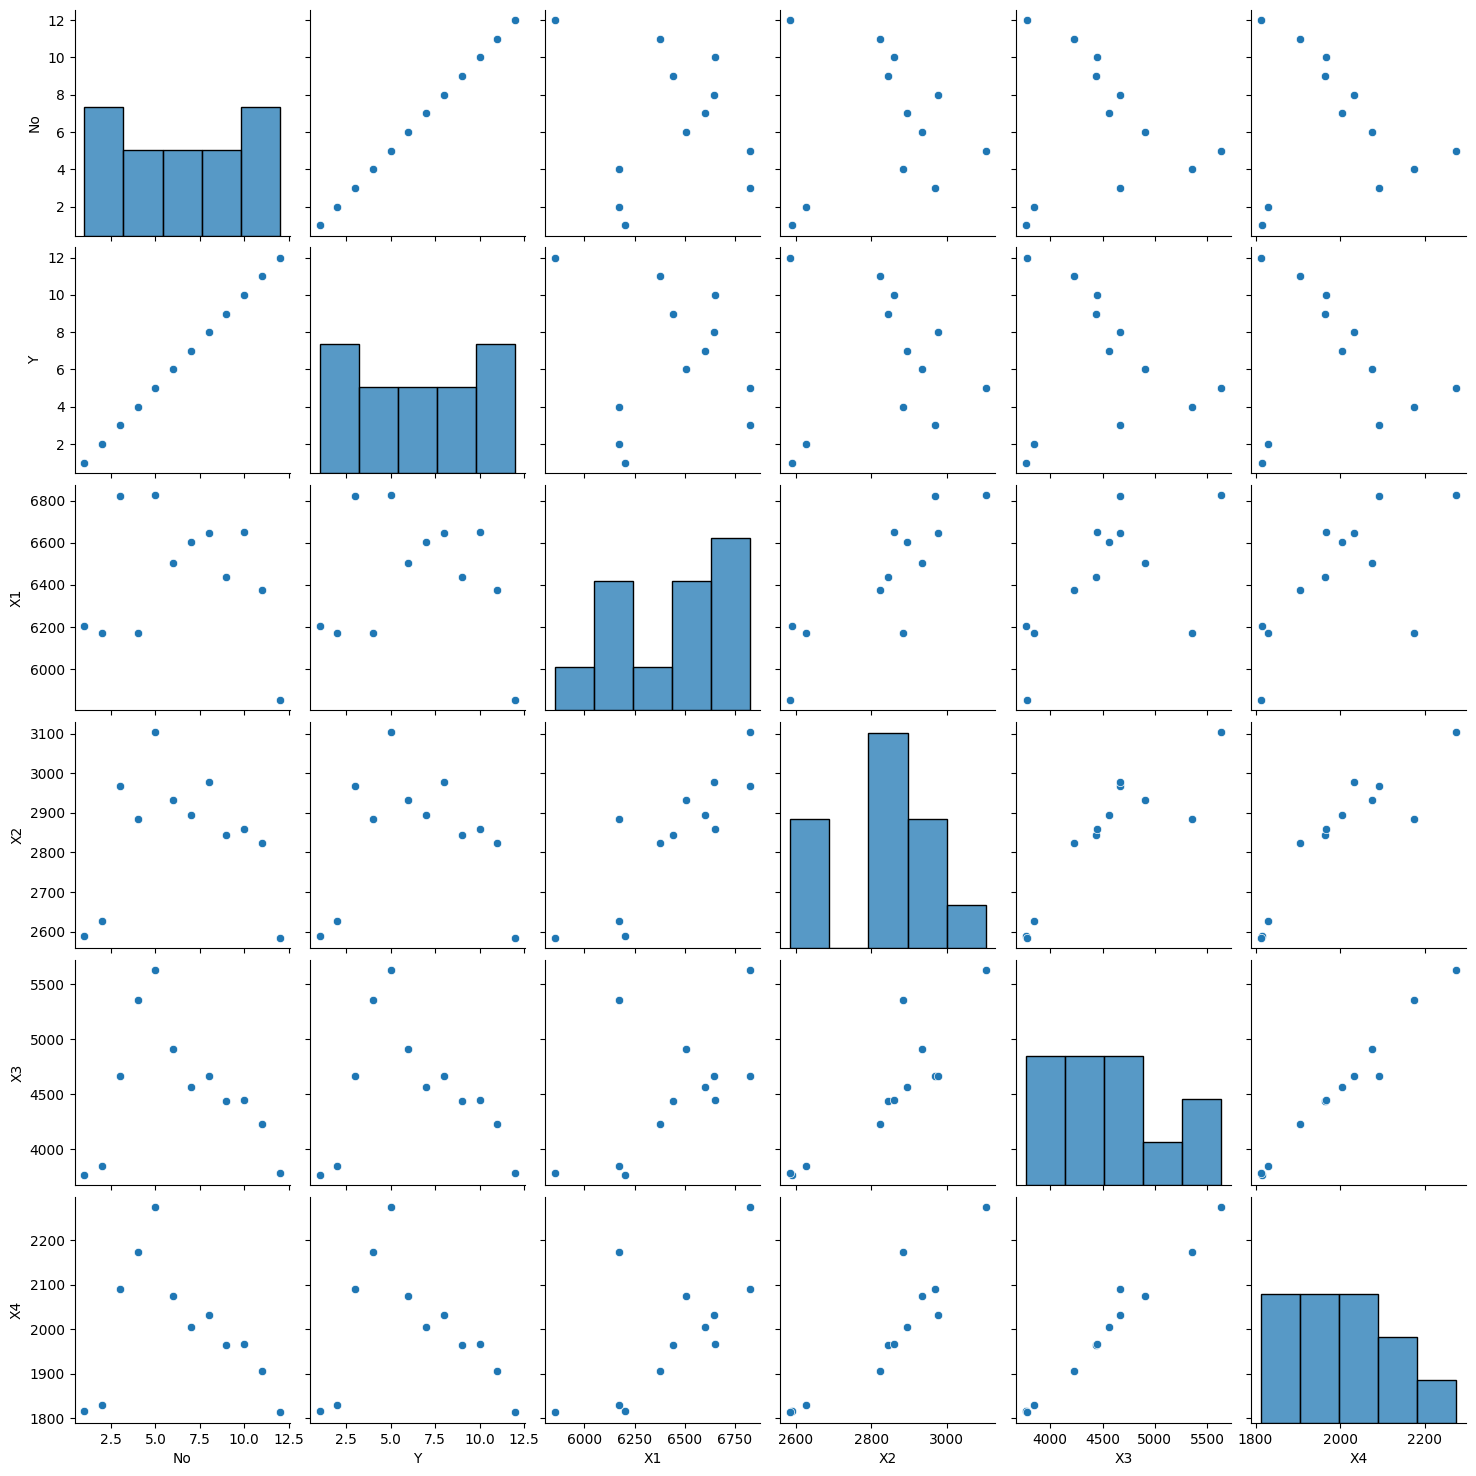

In [ ]:
sns.pairplot(monthly_mlr_data)

In [ ]:
X2 = monthly_mlr_data[['X1', 'X2', 'X3', 'X4']]

In [ ]:
Y2 = monthly_mlr_data['Y']

### Modeling

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X2,Y2)

LinearRegression()

In [ ]:
y_pred2 = model2.predict(X2)
y_pred2

array([ 2.5186731 ,  4.9715913 ,  3.14238939,  4.87246905,  3.45387075,
        7.82510232,  6.99347055, 10.41686008,  8.4184744 ,  5.88993329,
       11.23167772,  8.26548804])

In [ ]:
model2.score(X2,Y2)

0.6173982951395183

In [ ]:
print("R² Score:", r2_score(Y2,y_pred2))
print("MAE:", mean_absolute_error(Y2, y_pred2))
print("MSE:", mean_squared_error(Y2, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(Y2, y_pred2)))

R² Score: 0.6173982951395183
MAE: 1.663127161122852
MSE: 4.55933698292074
RMSE: 2.1352604016655063


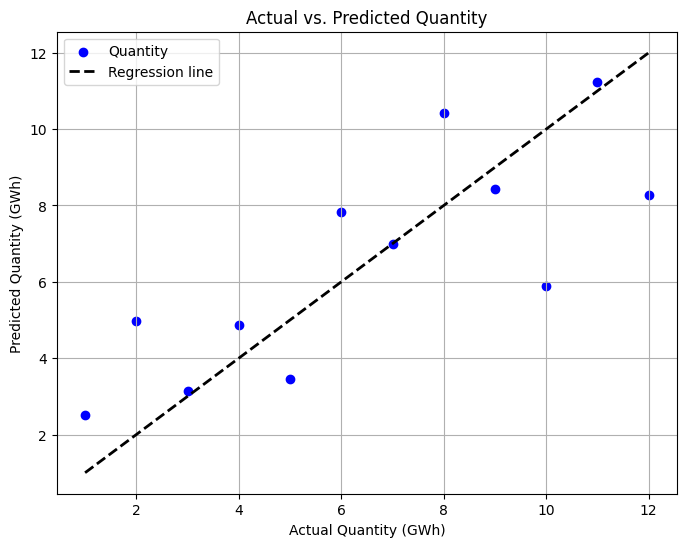

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y2, y_pred2, color='blue', label='Quantity')
plt.plot([Y2.min(), Y2.max()], [Y2.min(), Y2.max()], 'k--', lw=2, label='Regression line') # Add a diagonal line for reference
plt.xlabel('Actual Quantity (GWh)')
plt.ylabel('Predicted Quantity (GWh)')
plt.title('Actual vs. Predicted Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dframe

,Year,Month,Tariff,Quantity,UNIT
0,2002,January,Residential (< 150),488.424223,GWh
1,2002,January,Residential (> 150),1035.660954,GWh
2,2002,January,Small General,693.458475,GWh
3,2002,January,Medium General,1415.308196,GWh
4,2002,January,Large General,2957.601319,GWh
...,...,...,...,...,...
3583,2024,December,Temporary,123.352195,GWh
3584,2024,December,Stand By Rate,14.762940,GWh
3585,2024,December,Interruptible Rate,101.474145,GWh
3586,2024,December,Free of Charge,408.309461,GWh
